In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.ticker
import select_work
import pausing
import codons
import brewer2mpl
import scipy.stats
from scipy.linalg import expm
import cartoon

In [8]:
experiments = select_work.build_all_experiments()
enrichments = select_work.load_all_enrichments()

simulation_experiments = select_work.build_all_simulation_experiments(verbose=False)

names = ['CHX_015_100_change_all',
        ]

simulated_enrichments = {name: simulation_experiments[name].read_file('stratified_mean_enrichments') for name in names}

In [3]:
experiment = experiments['belgium_2014_12_10']['WT_1_FP']
buffered_codon_counts = experiment.read_file('buffered_codon_counts', specific_keys={'relaxed', 'identities'})
codon_counts = {name: buffered_codon_counts[name]['relaxed']['start_codon':('stop_codon', 1)] for name in buffered_codon_counts}

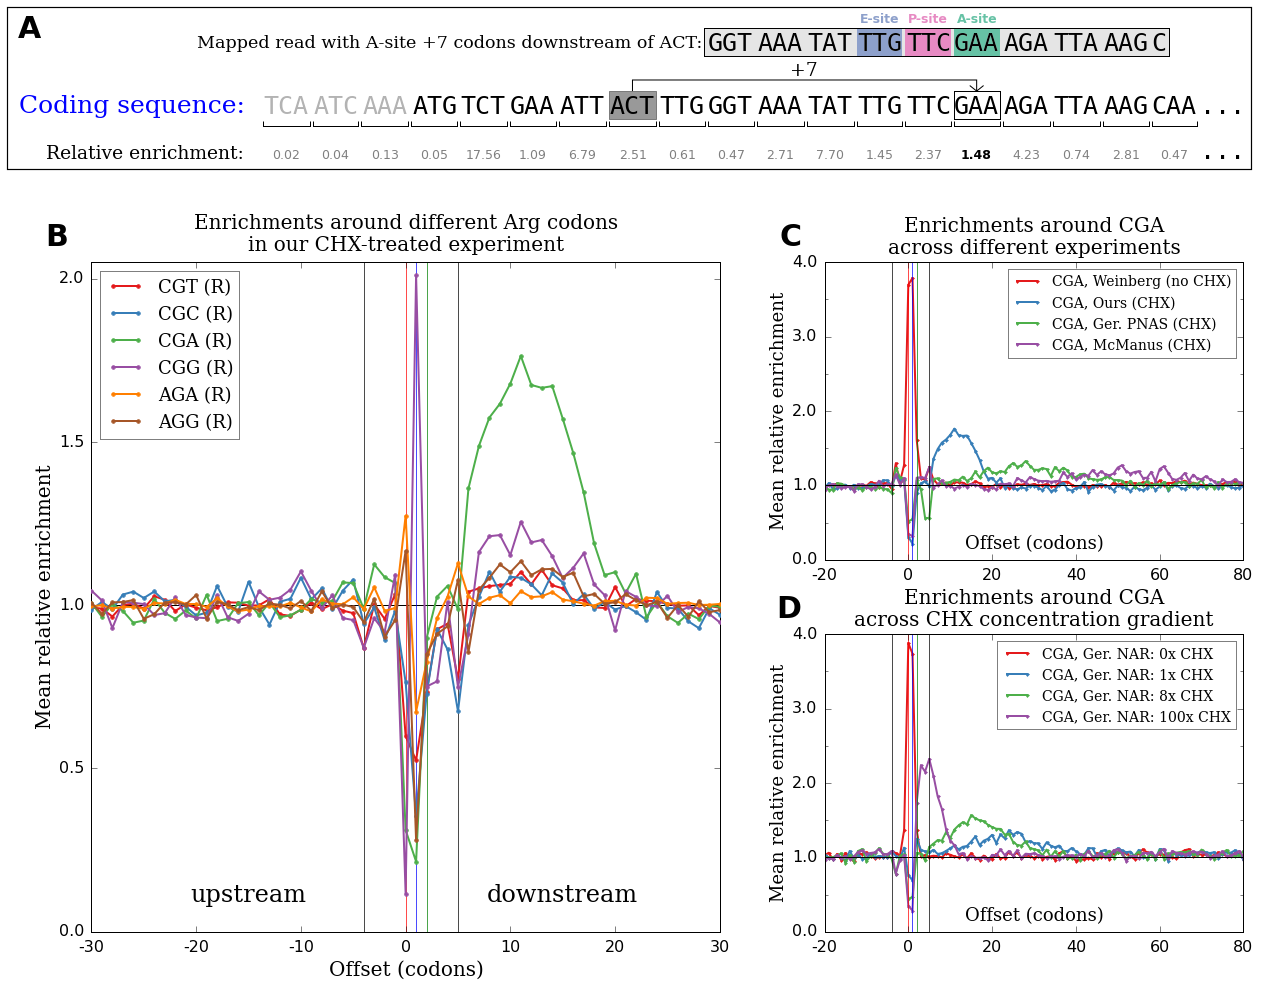

In [4]:
fig = plt.figure(figsize=(16, 16))

gs = matplotlib.gridspec.GridSpec(3, 2, height_ratios=[0.5, 1, 1], width_ratios=[1.5, 1])
gs.update(left=0, right=1, hspace=0.3)
axs = [fig.add_subplot(gs[0, :]),
       fig.add_subplot(gs[1:, 0]),
       fig.add_subplot(gs[1, 1]),
       fig.add_subplot(gs[2, 1]),
      ]

cartoon_ax, ax_A, ax_B, ax_C = axs

codon_id = 'ACT'
gene = 'YLR044C'
font_size = 25
plot_up_to = 19
UTR_codons = 3
offset = -7
cds = cartoon.CodingSequence(cartoon_ax, buffered_codon_counts, gene, font_size=font_size, plot_up_to=plot_up_to, UTR_codons=UTR_codons)
cds.draw_codon_sequence(0.15, 0.5, highlight_offset=offset, highlight_sequence=codon_id, label='Coding sequence:')

label = 'Mapped read with A-site {0:+d} codons downstream of {1}:'.format(-offset, codon_id)
cds.draw_read(4 - offset, y_gap=2.5, label=label)
#cds.draw_codon_counts()
cds.draw_codon_enrichments()
cds.rectangle_around_everything()

_ = pausing.plot_codon_enrichments(['WT_2_FP'],
                                   enrichments,
                                   codons.full_back_table['R'],
                                   min_x=-30,
                                   max_x=30,
                                   flip=True,
                                   ax=ax_A,
                                   force_ylims=(0, 2.05),
                                   legend_kwargs={'loc': 'upper left',
                                                  'prop': {'family': 'serif', 'size': 18},
                                                 },
                                   only_show_highlights=True,
                                   marker_size=8,
                                   line_width=2,
                                  )

dosages = [
    ('oxidative_noCHX', 'CGA, Ger. NAR: 0x CHX'),
    ('oxidative_1x_CHX', 'CGA, Ger. NAR: 1x CHX'),
    ('oxidative_8x_CHX', 'CGA, Ger. NAR: 8x CHX'),
    ('oxidative_100x_CHX_rep1', 'CGA, Ger. NAR: 100x CHX'),
]

dosage_names, _ = zip(*dosages)
dosage_sample_to_label=dict(dosages)

_ = pausing.plot_codon_enrichments(dosage_names,
                                   enrichments,
                                   ['CGA',],
                                   min_x=-80,
                                   max_x=20,
                                   log_scale=False,
                                   force_ylims=(0, 4),
                                   split_by_codon=True,
                                   flip=True,
                                   ax=ax_C,
                                   sample_to_label=dosage_sample_to_label,
                                   marker_size=6,
                                   line_width=2,
                                   legend_kwargs={'loc': 'upper right',
                                                  'prop': {'family': 'serif', 'size': 14},
                                                 },
                                  )

across_experiments = [
    ('RPF', 'CGA, Weinberg (no CHX)'),
    ('WT_2_FP', 'CGA, Ours (CHX)'),
    ('Initial_rep2_foot', 'CGA, Ger. PNAS (CHX)'),
    ('S._cerevisiae_Ribo-seq_Rep_1', 'CGA, McManus (CHX)'),
]

across_experiments_names, _ = zip(*across_experiments)
across_experiments_sample_to_label = dict(across_experiments)

_ = pausing.plot_codon_enrichments(across_experiments_names,
                                   enrichments,
                                   ['CGA'],
                                   min_x=-80,
                                   max_x=20,
                                   log_scale=False,
                                   force_ylims=(0, 4),
                                   split_by_codon=True,
                                   flip=True,
                                   ax=ax_B,
                                   sample_to_label=across_experiments_sample_to_label,
                                   marker_size=6,
                                   line_width=2,
                                   legend_kwargs={'loc': 'upper right',
                                                  'prop': {'family': 'serif', 'size': 14},
                                                 },
                                  )
    
axs[0].annotate('A',
                xy=(0, 1),
                xycoords='axes fraction',
                xytext=(-50, -5),
                textcoords='offset points',
                ha='right',
                va='bottom',
                size=30,
                weight='bold',
               )
    
for ax, letter in zip(axs[1:], 'BCDEF'):
    ax.annotate(letter,
                xy=(0, 1),
                xycoords='axes fraction',
                xytext=(-25, 10),
                textcoords='offset points',
                ha='right',
                va='bottom',
                size=30,
                weight='bold',
               )
    
ax_A.set_title('Enrichments around different Arg codons\nin our CHX-treated experiment', size=20, y=1.01, family='serif')
ax_B.set_title('Enrichments around CGA\nacross different experiments', size=20, y=1.01, family='serif')
ax_C.set_title('Enrichments around CGA\nacross CHX concentration gradient', size=20, y=1.01, family='serif')

for ax in (ax_B, ax_C):
    ax.set_xlabel('Offset (codons)', size=18, labelpad=-48, family='serif')
    ax.set_ylabel('Mean relative enrichment', size=18, family='serif')
    major_locator = matplotlib.ticker.MultipleLocator(1)
    minor_locator = matplotlib.ticker.AutoMinorLocator(2)
    major_formattor = matplotlib.ticker.FormatStrFormatter('%0.1f')
    ax.yaxis.set_major_locator(major_locator)
    ax.yaxis.set_minor_locator(minor_locator)
    ax.yaxis.set_major_formatter(major_formattor)
    
ax_A.set_xlabel('Offset (codons)', size=20, family='serif')
ax_A.set_ylabel('Mean relative enrichment', size=20, family='serif')

for ax in axs:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_size(16)
        
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3)
    ax.tick_params(pad=8)
        
ax_A.annotate('upstream',
                xy=(0.25, 0),
                xycoords='axes fraction',
                xytext=(0, 25),
                textcoords='offset points',
                ha='center',
                va='bottom',
                size=24,
                family='serif',
               )

ax_A.annotate('downstream',
                xy=(0.75, 0),
                xycoords='axes fraction',
                xytext=(0, 25),
                textcoords='offset points',
                ha='center',
                va='bottom',
                size=24,
                family='serif',
               )

fig.savefig('paper/shadow_properties.png', bbox_inches='tight')

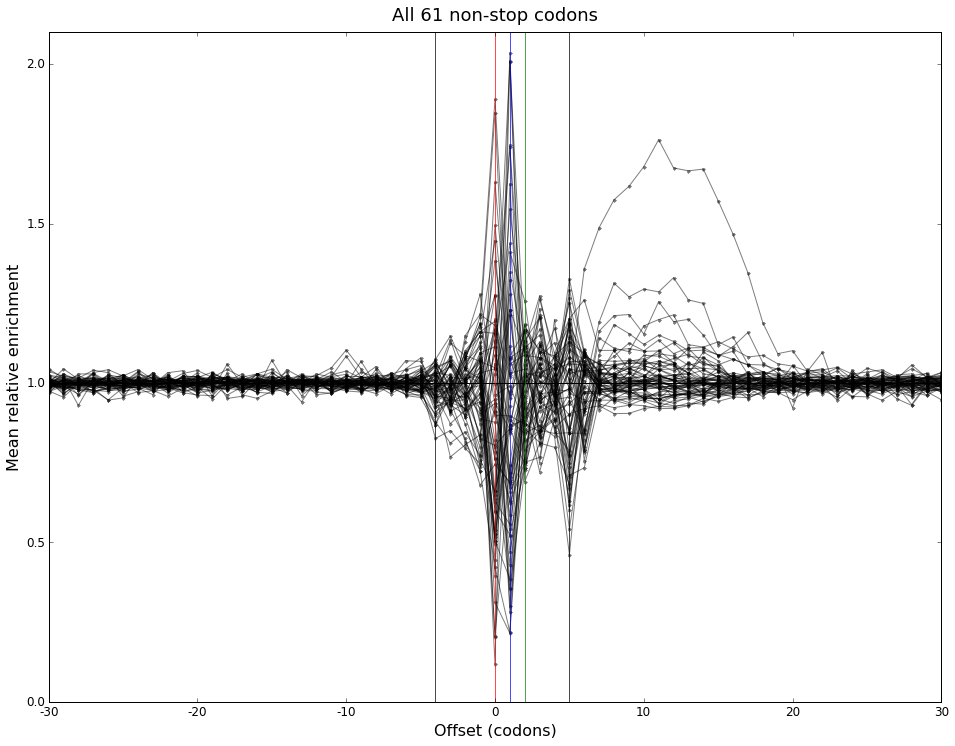

In [392]:
size = 8
fig, ax = plt.subplots(figsize=(16, 12))

_ = pausing.plot_codon_enrichments(['WT_2_FP'],
                                   enrichments,
                                   [],
                                   min_x=-30,
                                   max_x=30,
                                   flip=True,
                                   ax=ax,
                                   force_ylims=(0, 2.1),
                                   legend_kwargs={'loc': 'upper left',
                                                  'fontsize': 12,
                                                 },
                                   marker_size=10,
                                   line_width=1.5,
                                  )
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_size(12)

ax.set_title('All 61 non-stop codons', y=1.01, size=18)
    
fig.savefig('paper/peaks_all_codons.png', bbox_inches='tight')

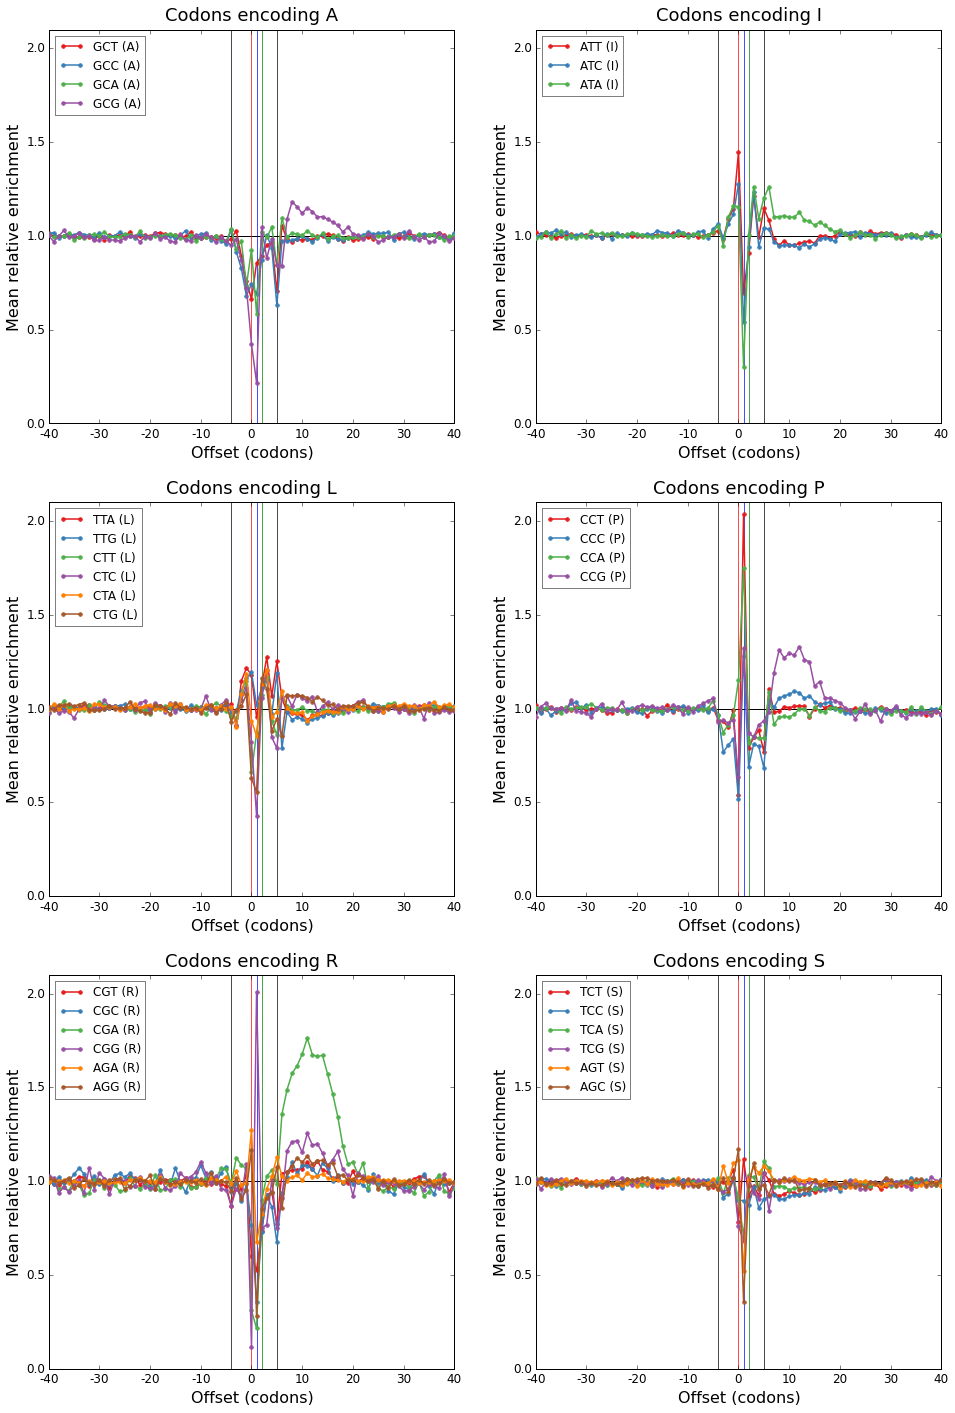

In [7]:
aas = ['A', 'I', 'L', 'P', 'R', 'S']

size = 8
fig, axs = plt.subplots(3, 2, figsize=(size * 2, size * 3))

for aa, ax in zip(aas, axs.flatten()):
    _ = pausing.plot_codon_enrichments(['WT_2_FP'],
                                       enrichments,
                                       codons.full_back_table[aa],
                                       min_x=-40,
                                       max_x=40,
                                       flip=True,
                                       ax=ax,
                                       force_ylims=(0, 2.1),
                                       legend_kwargs={'loc': 'upper left',
                                                      'fontsize': 12,
                                                     },
                                       only_show_highlights=True,
                                       marker_size=8,
                                       line_width=1.5,
                                      )
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_size(16)

    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_size(12)
        
    ax.set_title('Codons encoding {0}'.format(aa), y=1.01, size=18)
    
fig.savefig('paper/peaks_many_amino_acids.png', bbox_inches='tight')

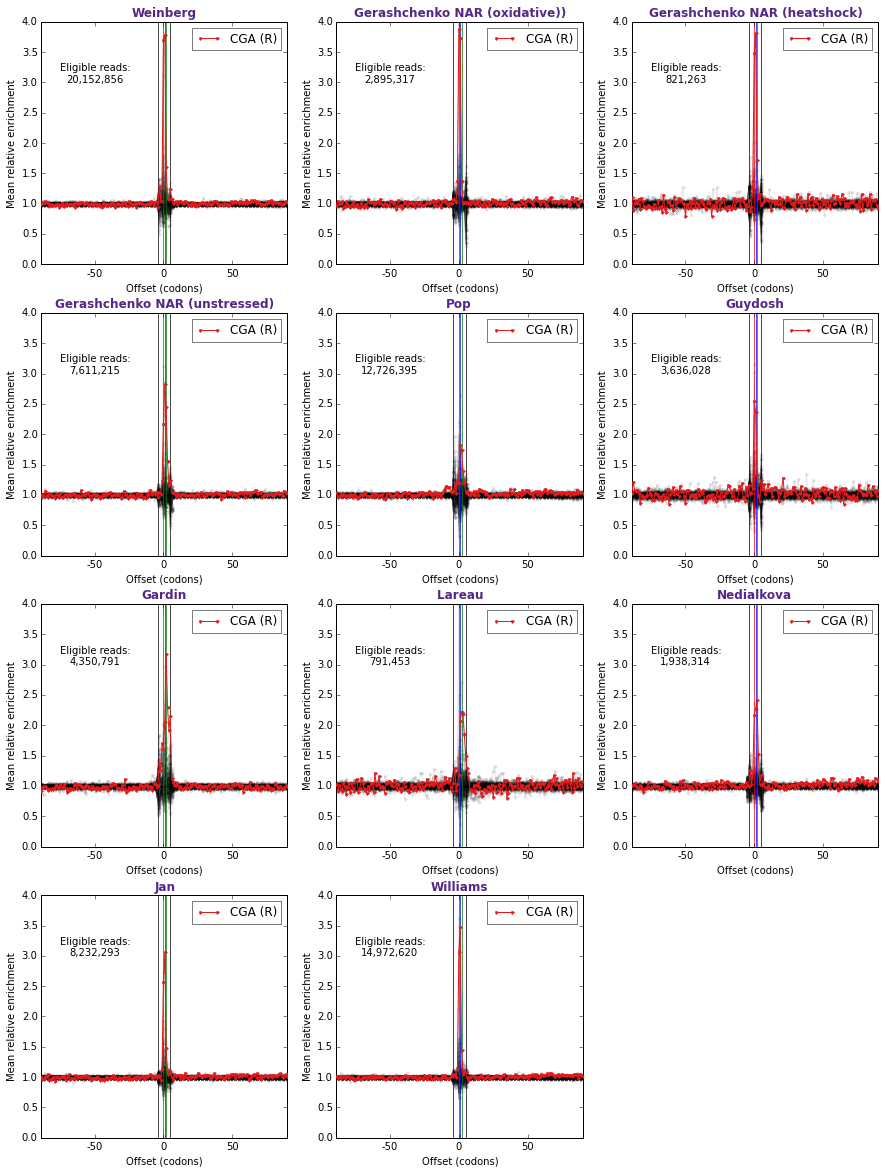

In [6]:
import itertools

noCHX_experiments = [
    ('RPF', 'Weinberg'),
    ('oxidative_noCHX', 'Gerashchenko NAR (oxidative))'),
    ('heatshock_noCHX', 'Gerashchenko NAR (heatshock)'),
    ('unstressed_noCHX', 'Gerashchenko NAR (unstressed)'), 
    ('WT_footprint', 'Pop'),
    ('wild-type_no_additive', 'Guydosh'),
    ('ribosome_footprints_for_wildtype', 'Gardin'),
    ('Untreated_replicate_1', 'Lareau '),
    ('WT_ribo_YPD_noCHX_rep2', 'Nedialkova'),
    ('sec63mVenusBirA_-CHX_7minBiotin_input', 'Jan'),
    ('Om45mVenusBirA_-CHX_2minBiotin_input', 'Williams'),
]

noCHX_names, _ = zip(*noCHX_experiments)
noCHX_sample_to_label = dict(zip(*np.array(noCHX_experiments).T[:2]))

fig, axs = plt.subplots(4, 3, figsize=(5 * 3, 5 * 4))

for name, ax in itertools.izip_longest(noCHX_names, axs.flatten()):
    if name == None:
        fig.delaxes(ax)
        continue
        
    _ = pausing.plot_codon_enrichments([name],
                                       enrichments,
                                       ['CGA'],
                                       min_x=-90,
                                       max_x=89,
                                       log_scale=False,
                                       force_ylims=(0, 4),
                                       flip=True,
                                       ax=ax,
                                       sample_to_label=noCHX_sample_to_label,
                                       marker_size=6,
                                       mark_active_sites=True,
                                      )
    ax.title.set_color(pausing.dark_noCHX)
    ax.title.set_weight('bold')
    
    ax.text(50, 3, 'Eligible reads:\n{:,}'.format(enrichments[name].arrays['0.10']['total_relevant_counts']),
            ha='center',
           )
    
fig.savefig('paper/all_noCHX_shadows.png', bbox_inches='tight')

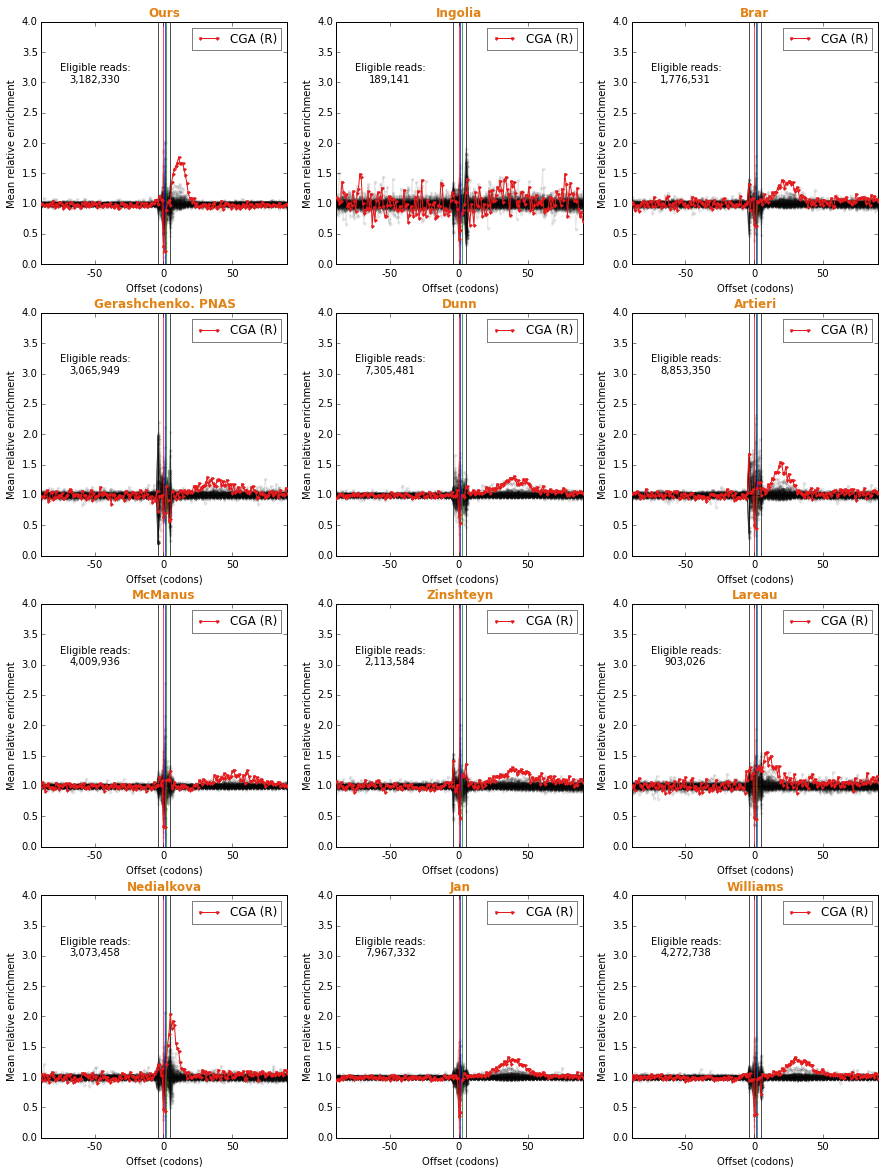

In [7]:
CHX_experiments = [
    ('WT_2_FP', 'Ours'),
    ('Footprints-rich-1', 'Ingolia'),
    ('footprints_for_exponential_vegetative_cells_of_the_strain_gb15_used_for_the_traditional_timecourse', 'Brar'),
    ('Initial_rep1_foot', 'Gerashchenko. PNAS'),
    ('dunn_elife', 'Dunn'),
    ('non_multiplexed', 'Artieri'),
    ('S._cerevisiae_Ribo-seq_Rep_1', 'McManus'),
    ('WT_Ribosome_Footprint_1', 'Zinshteyn'),
    ('Cycloheximide_replicate_1', 'Lareau'),
    ('WT_ribo_YPD_rep1', 'Nedialkova'),
    ('sec63mVenusBirA_+CHX_7minBiotin_input', 'Jan'),
    ('Om45mVenusBirA_+CHX_2minBiotin_input', 'Williams'),
]

CHX_names, _ = zip(*CHX_experiments)
CHX_sample_to_label = dict(zip(*np.array(CHX_experiments).T[:2]))

fig, axs = plt.subplots(4, 3, figsize=(5 * 3, 5 * 4))

for name, ax in itertools.izip_longest(CHX_names, axs.flatten()):
    if name == None:
        fig.delaxes(ax)
        continue
        
    _ = pausing.plot_codon_enrichments([name],
                                       enrichments,
                                       ['CGA'],
                                       min_x=-90,
                                       max_x=89,
                                       log_scale=False,
                                       force_ylims=(0, 4),
                                       flip=True,
                                       ax=ax,
                                       sample_to_label=CHX_sample_to_label,
                                       marker_size=6,
                                       mark_active_sites=True,
                                      )
    ax.title.set_color(pausing.light_CHX)
    ax.title.set_weight('bold')
    
    ax.text(50, 3, 'Eligible reads:\n{:,}'.format(enrichments[name].arrays['0.10']['total_relevant_counts']),
            ha='center',
           )
    
fig.savefig('paper/all_CHX_shadows.png', bbox_inches='tight')

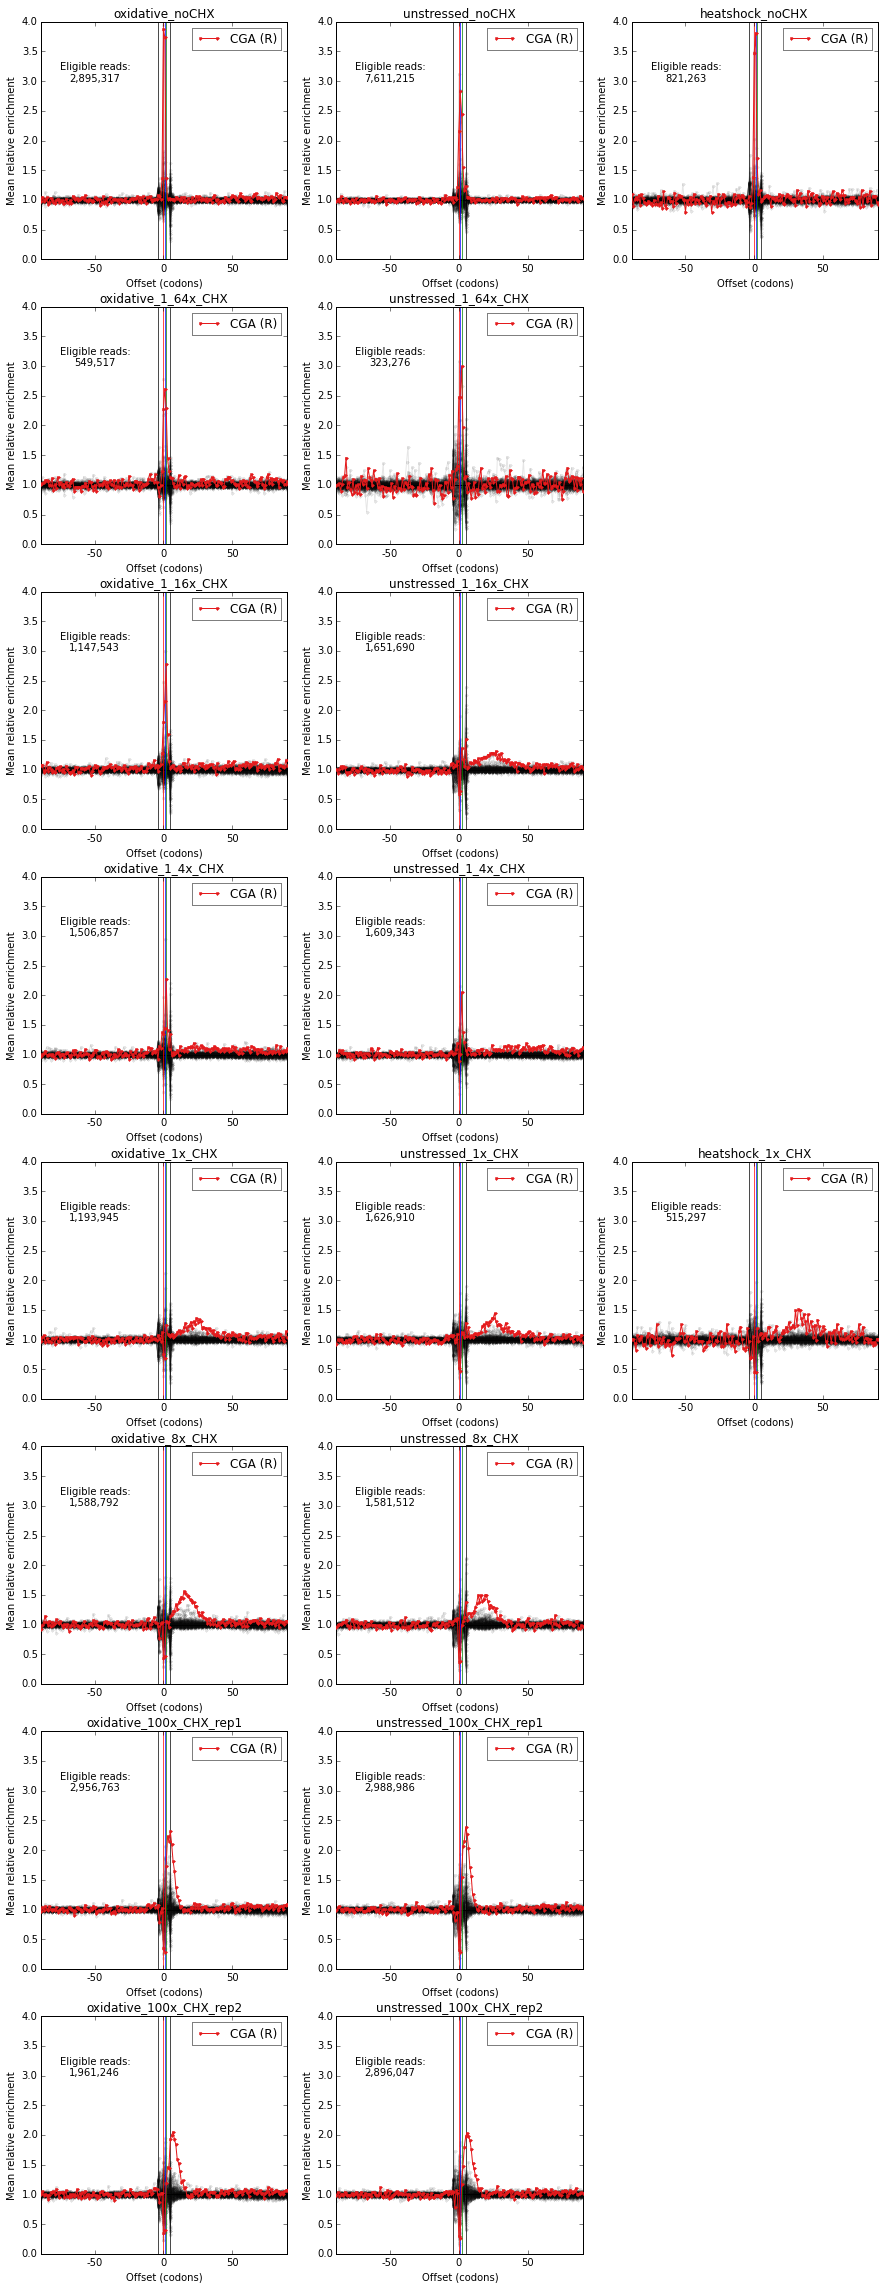

In [27]:
dosages = [[('oxidative_noCHX', 'CGA, 0x CHX'),
            ('oxidative_1_64x_CHX', 'CGA, 1/64x CHX'),
            ('oxidative_1_16x_CHX', 'CGA, 1/16x CHX'),
            ('oxidative_1_4x_CHX', 'CGA, 1/4x CHX'),
            ('oxidative_1x_CHX', 'CGA, 1x CHX'),
            ('oxidative_8x_CHX', 'CGA, 8x CHX'),
            ('oxidative_100x_CHX_rep1', 'CGA, 100x CHX (rep1)'),
            ('oxidative_100x_CHX_rep2', 'CGA, 100x CHX (rep2)'),
           ],
           [('unstressed_noCHX', 'CGA, 0x CHX'),
            ('unstressed_1_64x_CHX', 'CGA, 1/64x CHX'),
            ('unstressed_1_16x_CHX', 'CGA, 1/16x CHX'),
            ('unstressed_1_4x_CHX', 'CGA, 1/4x CHX'),
            ('unstressed_1x_CHX', 'CGA, 1x CHX'),
            ('unstressed_8x_CHX', 'CGA, 8x CHX'),
            ('unstressed_100x_CHX_rep1', 'CGA, 100x CHX (rep1)'),
            ('unstressed_100x_CHX_rep2', 'CGA, 100x CHX (rep2)'),
           ],
           [('heatshock_noCHX', '0x CHX'),
            (None, None),
            (None, None),
            (None, None),
            ('heatshock_1x_CHX', '1x CHX'),
            (None, None),
            (None, None),
            (None, None),
           ]
]

fig, axs = plt.subplots(len(dosages[0]), len(dosages),
                        figsize=(5 * len(dosages), 5 * len(dosages[0])),
                       )

for dosage_col, ax_col in zip(dosages, axs.T):
    dosage_names, _ = zip(*dosage_col)
    dosage_sample_to_label=dict(dosage_col)
    for ax, name in zip(ax_col, dosage_names):
        if name == None:
            fig.delaxes(ax)
            continue
            
        _ = pausing.plot_codon_enrichments([name],
                                           enrichments,
                                           ['CGA'],
                                           min_x=-90,
                                           max_x=89,
                                           log_scale=False,
                                           force_ylims=(0, 4),
                                           flip=True,
                                           ax=ax,
                                           #sample_to_label=dosage_sample_to_label,
                                           marker_size=6,
                                           mark_active_sites=True,
                                          )
        
        ax.text(50, 3, 'Eligible reads:\n{:,}'.format(enrichments[name].arrays['0.10']['total_relevant_counts']),
                ha='center',
               )

fig.savefig('paper/all_gradient_shadows.png', bbox_inches='tight')

In [75]:
def make_P(betas):   
    L = np.zeros((len(betas) + 1, len(betas) + 1))

    for i, b in enumerate(np.concatenate(([1000], betas))):
        L[i, i] = -1. / b
        if i < len(betas):
            L[i, i + 1] = 1. / b
        else:
            L[i, 0] = 1. / b
    
    def P(t):
        return expm(t * L)
    
    return P

def exclude_dummy_state(P, p_0, t):
    p = np.dot(P(t).T, p_0)
    normalized = p[1:] / np.mean(p[1:])
    return normalized

def get_steady_state(P):
    return P(100000)[0]

def simulation_and_analytical(before, after, amino_acid, simulation_ylims, analytical_ylims, simulation_tick_multiple, analytical_tick_multiple, kind):
    betas_before = np.ones(201)
    betas_before[100] = before

    P_before = make_P(betas_before)
    p_before = get_steady_state(P_before)

    betas_after = np.copy(betas_before)
    betas_after[100] = after
    P_after = make_P(betas_after)
    p_after = get_steady_state(P_after)

    analytic_height = 3
    analytic_width = 4

    row_gap = 0.3
    col_gap = 0.4

    total_width = analytic_width
    total_height = analytic_height

    analytic_x = 0
    analytic_y = 0

    inset_width = analytic_width * 0.52
    inset_height = analytic_height * 0.52

    size = 2.5

    fig = plt.figure(figsize=(size * total_width, size * total_height))

    analytic_ax = fig.add_axes([analytic_x / total_width, analytic_y / total_height, analytic_width / total_width, analytic_height / total_height])
    inset_ax = fig.add_axes([(analytic_x + 0.975 * analytic_width - inset_width) / total_width,
                             (analytic_y + 0.975 * analytic_height - inset_height) / total_height,
                             inset_width / total_width,
                             inset_height / total_height,
                            ],
                           )

    ts = [0, 0.5, 10, 25, 50]

    xs = np.arange(len(betas_before)) - 100

    for i, t in enumerate(ts):
        ys = exclude_dummy_state(P_after, p_before, t)
        lines, = analytic_ax.plot(xs, ys, '.-',
                                  linewidth=2,
                                  markersize=8,
                                  alpha=0.8,
                                  label='$\Delta t = $' + str(t),
                                  #zorder=100 - i,
                                 )
        if kind == 'enrichment':
            index = np.argmax(ys)
            x = xs[index]
            y = ys[index]

            if t in [0.5]:
                x_offset = 40
                y_offset = 0
            else:
                x_offset = 0
                y_offset = 15

            analytic_ax.annotate('$t = $' + str(t),
                                 xy=(x, y),
                                 xycoords='data',
                                 xytext=(x_offset, y_offset),
                                 textcoords='offset points',
                                 size=18,
                                 va='center',
                                 ha='center',
                                 color=lines.get_color(),
                                )
            
        elif kind == 'depletion':
            if t == 0:
                index = np.argmax(ys)
                x_offset = 40
                y_offset = 10
            else:
                index = np.argmin(ys)
                x_offset = 0
                y_offset = -5

            x = xs[index]
            y = ys[index]
            analytic_ax.annotate('$t = $' + str(t),
                                 xy=(x, y),
                                 xycoords='data',
                                 xytext=(x_offset, y_offset),
                                 textcoords='offset points',
                                 size=18,
                                 va='top',
                                 ha='center',
                                 color=lines.get_color(),
                                )

    analytic_ax.set_xlim(-10, 70)
    analytic_ax.set_ylim(*analytical_ylims)
    analytic_ax.set_xlabel('Offset (codons)', family='serif', size=20)
    analytic_ax.set_ylabel('Analytical ribosome density', family='serif', size=20)

    _ = pausing.plot_codon_enrichments(['CHX_015_100_change_all'],
                                       simulated_enrichments,
                                       codons.full_back_table[amino_acid],
                                       only_show_highlights=True,
                                       min_x=-30,
                                       max_x=20,
                                       log_scale=False,
                                       force_ylims=simulation_ylims,
                                       flip=True,
                                       ax=inset_ax,
                                       marker_size=8,
                                       line_width=2,
                                       legend_kwargs={'loc': 'upper left',
                                                      'ncol': 1,
                                                      'numpoints': 2,
                                                      'prop': {'size': 12,
                                                               #'family': 'serif',
                                                              },
                                                      'columnspacing': 0.3,
                                                      },
                                      )
    inset_ax.set_title('')
    inset_ax.set_xlabel('Offset (codons)', family='serif', size=18)
    inset_ax.set_ylabel('Simulated mean\nrelative enrichment', family='serif', size=18)


    inset_ax.annotate('A',
                    xy=(0, 1),
                    xycoords='axes fraction',
                    xytext=(-30, -10),
                    textcoords='offset points',
                    ha='right',
                    va='center',
                    size=30,
                    weight='bold',
                   )

    analytic_ax.annotate('B',
                    xy=(0, 1),
                    xycoords='axes fraction',
                    xytext=(-30, 0),
                    textcoords='offset points',
                    ha='right',
                    va='center',
                    size=30,
                    weight='bold',
                   )

    for ax in [analytic_ax]:
        major_locator = matplotlib.ticker.MultipleLocator(analytical_tick_multiple)
        minor_locator = matplotlib.ticker.AutoMinorLocator(2)
        major_formattor = matplotlib.ticker.FormatStrFormatter('%0.1f')
        ax.yaxis.set_major_locator(major_locator)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_major_formatter(major_formattor)

        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_size(16)

        ax.tick_params(which='major', length=6)
        ax.tick_params(which='minor', length=3)
        ax.tick_params(pad=4)

    for ax in [inset_ax]:
        major_locator = matplotlib.ticker.MultipleLocator(simulation_tick_multiple)
        minor_locator = matplotlib.ticker.AutoMinorLocator(2)
        major_formattor = matplotlib.ticker.FormatStrFormatter('%0.1f')
        ax.yaxis.set_major_locator(major_locator)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_major_formatter(major_formattor)

        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_size(13)

        ax.tick_params(which='major', length=6)
        ax.tick_params(which='minor', length=3)
        ax.tick_params(pad=4)
        
    return fig

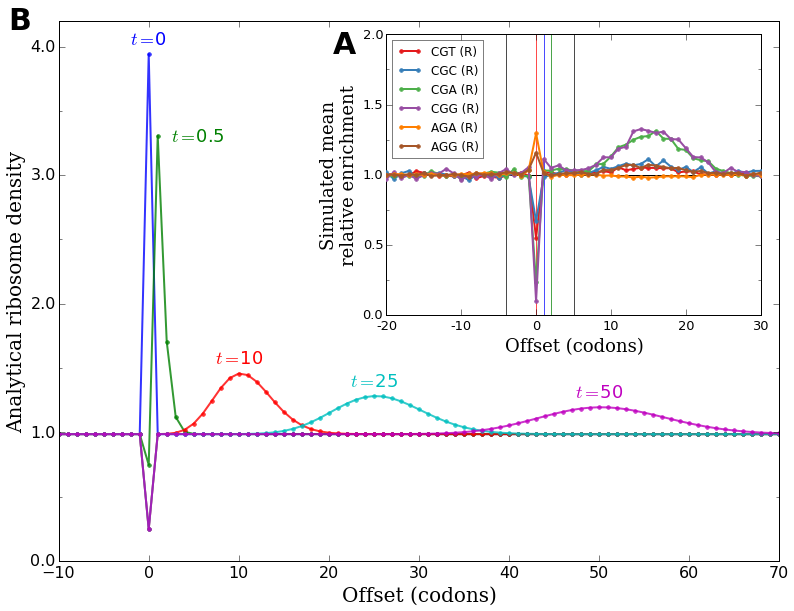

In [77]:
fig = simulation_and_analytical(4.0, 0.25, 'R', (0, 2.0), (0, 4.2), 0.5, 1.0, 'enrichment')
fig.savefig('paper/advancing_waves_enrichment.png', bbox_inches='tight')

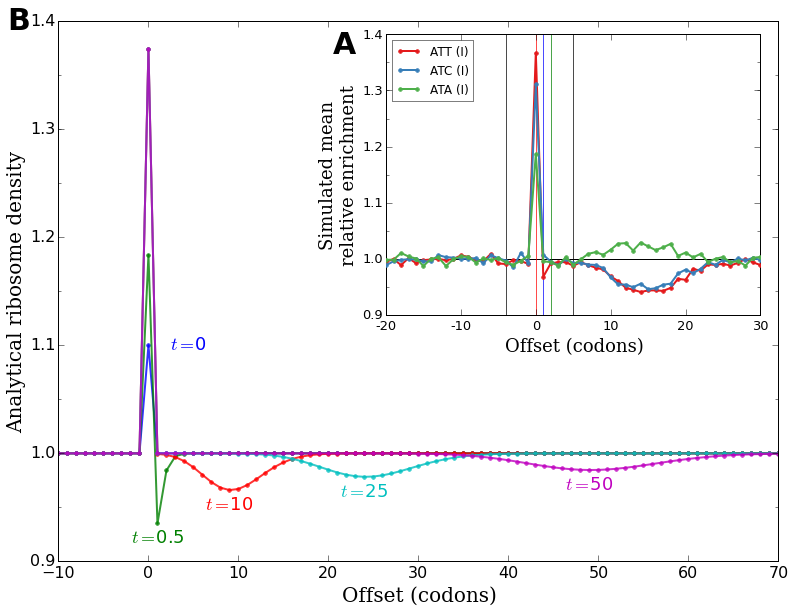

In [78]:
fig = simulation_and_analytical(1.1, 1.375, 'I', (0.9, 1.4), (0.9, 1.4), 0.1, 0.1, 'depletion')
fig.savefig('paper/advancing_waves_depletion.png', bbox_inches='tight')

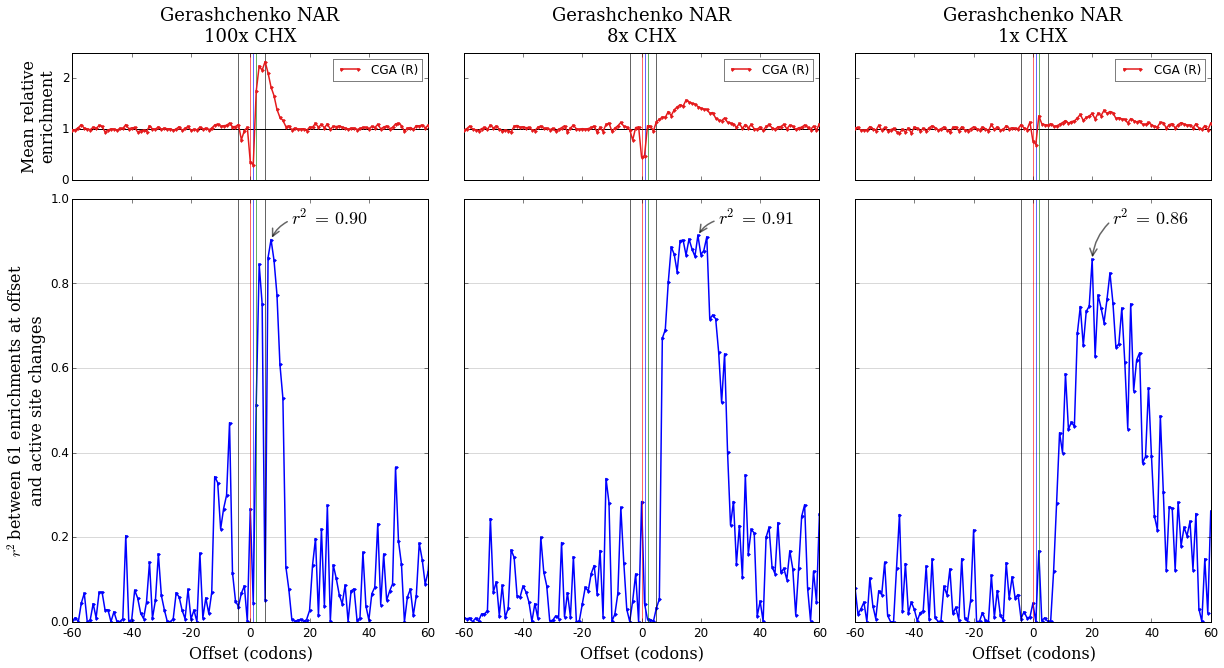

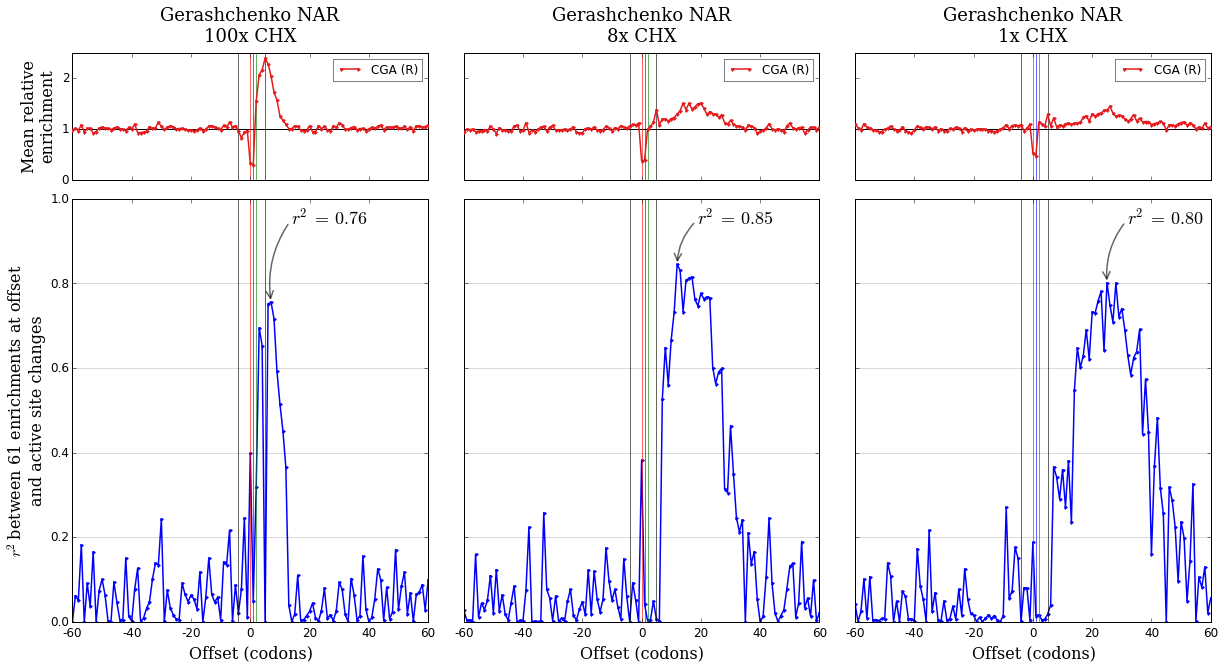

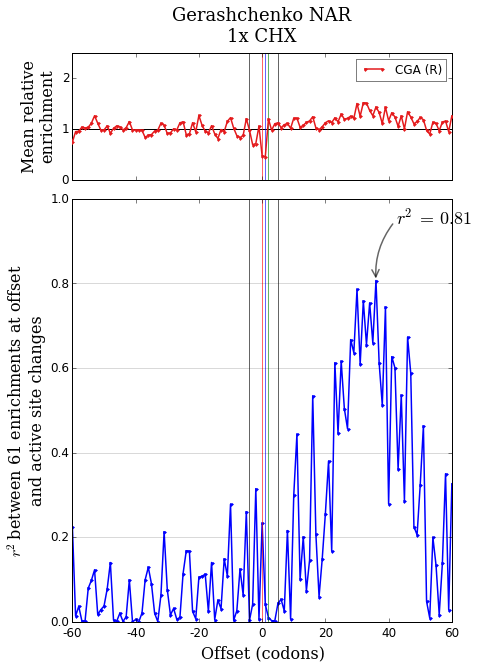

In [3]:
common_kwargs = dict(
    plot_lims=(-60, 60),
    size=1.7,
    use_P_sites=True,
    show_A_site=False,
    variance_explained=True,
    p_value_panels=False,
    text_size=18,
    enrichment_ylims=(0, 2.5),
)

dosages = [
    ('oxidative_noCHX', 'Gerashchenko NAR\n0x CHX'),
    ('oxidative_100x_CHX_rep1', 'Gerashchenko NAR\n100x CHX'),
    ('oxidative_8x_CHX', 'Gerashchenko NAR\n8x CHX'),
    ('oxidative_1x_CHX', 'Gerashchenko NAR\n1x CHX'),
]

dosage_names, dosage_labels = zip(*dosages)

fig = pausing.offset_difference_correlation(enrichments, dosage_names, **common_kwargs)

for ax, label in zip(fig.axes[:3], dosage_labels[1:]):
    ax.set_title(label, size=18, y=1.05, family='serif')
        
fig.savefig('paper/difference_predicts_amplitude_with_P_site_oxidative.png', bbox_inches='tight')

dosages = [
    ('unstressed_noCHX', 'Gerashchenko NAR\n0x CHX'),
    ('unstressed_100x_CHX_rep1', 'Gerashchenko NAR\n100x CHX'),
    ('unstressed_8x_CHX', 'Gerashchenko NAR\n8x CHX'),
    ('unstressed_1x_CHX', 'Gerashchenko NAR\n1x CHX'),
]

dosage_names, dosage_labels = zip(*dosages)

fig = pausing.offset_difference_correlation(enrichments, dosage_names, **common_kwargs)

for ax, label in zip(fig.axes[:3], dosage_labels[1:]):
    ax.set_title(label, size=18, y=1.05, family='serif')
        
fig.savefig('paper/difference_predicts_amplitude_with_P_site_unstressed.png', bbox_inches='tight')

dosages = [
    ('heatshock_noCHX', 'Gerashchenko NAR\n0x CHX'),
    ('heatshock_1x_CHX', 'Gerashchenko NAR\n1x CHX'),
]

dosage_names, dosage_labels = zip(*dosages)

fig = pausing.offset_difference_correlation(enrichments, dosage_names, **common_kwargs)

for ax, label in zip(fig.axes[:3], dosage_labels[1:]):
    ax.set_title(label, size=18, y=1.05, family='serif')
        
fig.savefig('paper/difference_predicts_amplitude_with_P_site_heatshock.png', bbox_inches='tight')

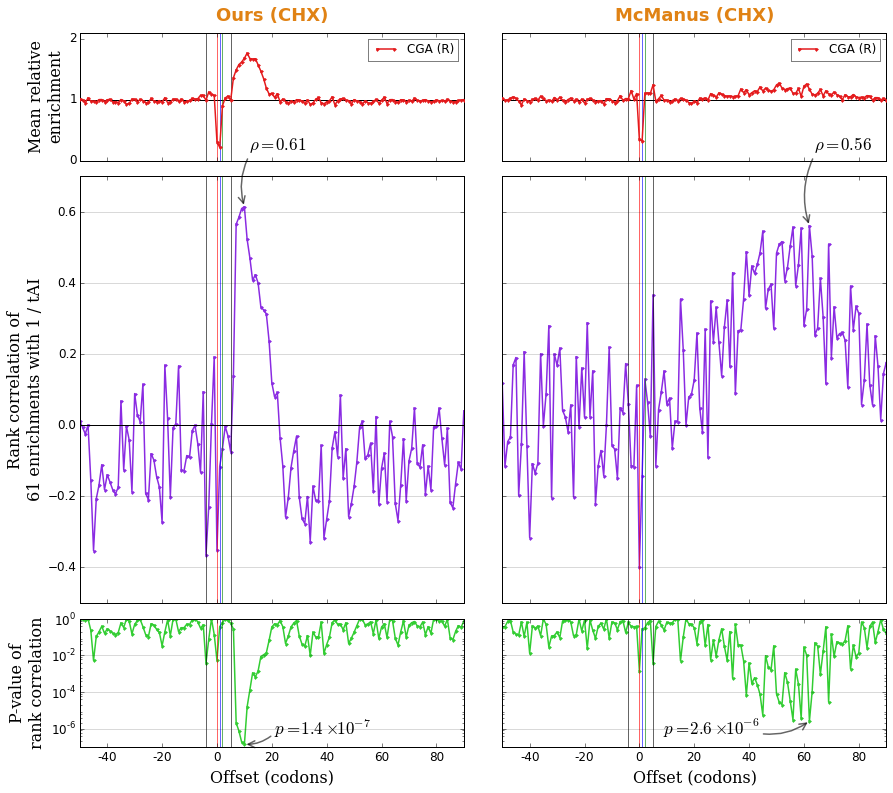

In [41]:
CHX_experiments = [
    ('WT_2_FP', 'Ours (CHX)', 30),
    ('S._cerevisiae_Ribo-seq_Rep_1', 'McManus (CHX)', -50),
]

names, labels, p_offsets = zip(*CHX_experiments)

fig = pausing.offset_tAI_correlation(enrichments, names, (-90, 50),
                                     min_p=-7,
                                     enrichment_ylims=(0, 2.1),
                                     #p_value_panels=False,
                                     size=8,
                                     p_offsets=p_offsets,
                                     text_size=17,
                                     tRNA_value_source='tAI',
                                     rho_ylims=(-0.5, 0.7),
                                    )
        
for ax, label in zip(fig.axes, labels):
    ax.set_title(label, size=18, y=1.05, color=pausing.light_CHX, weight='bold')
        
fig.savefig('paper/waves_recover_tAI_correlation.png', bbox_inches='tight')

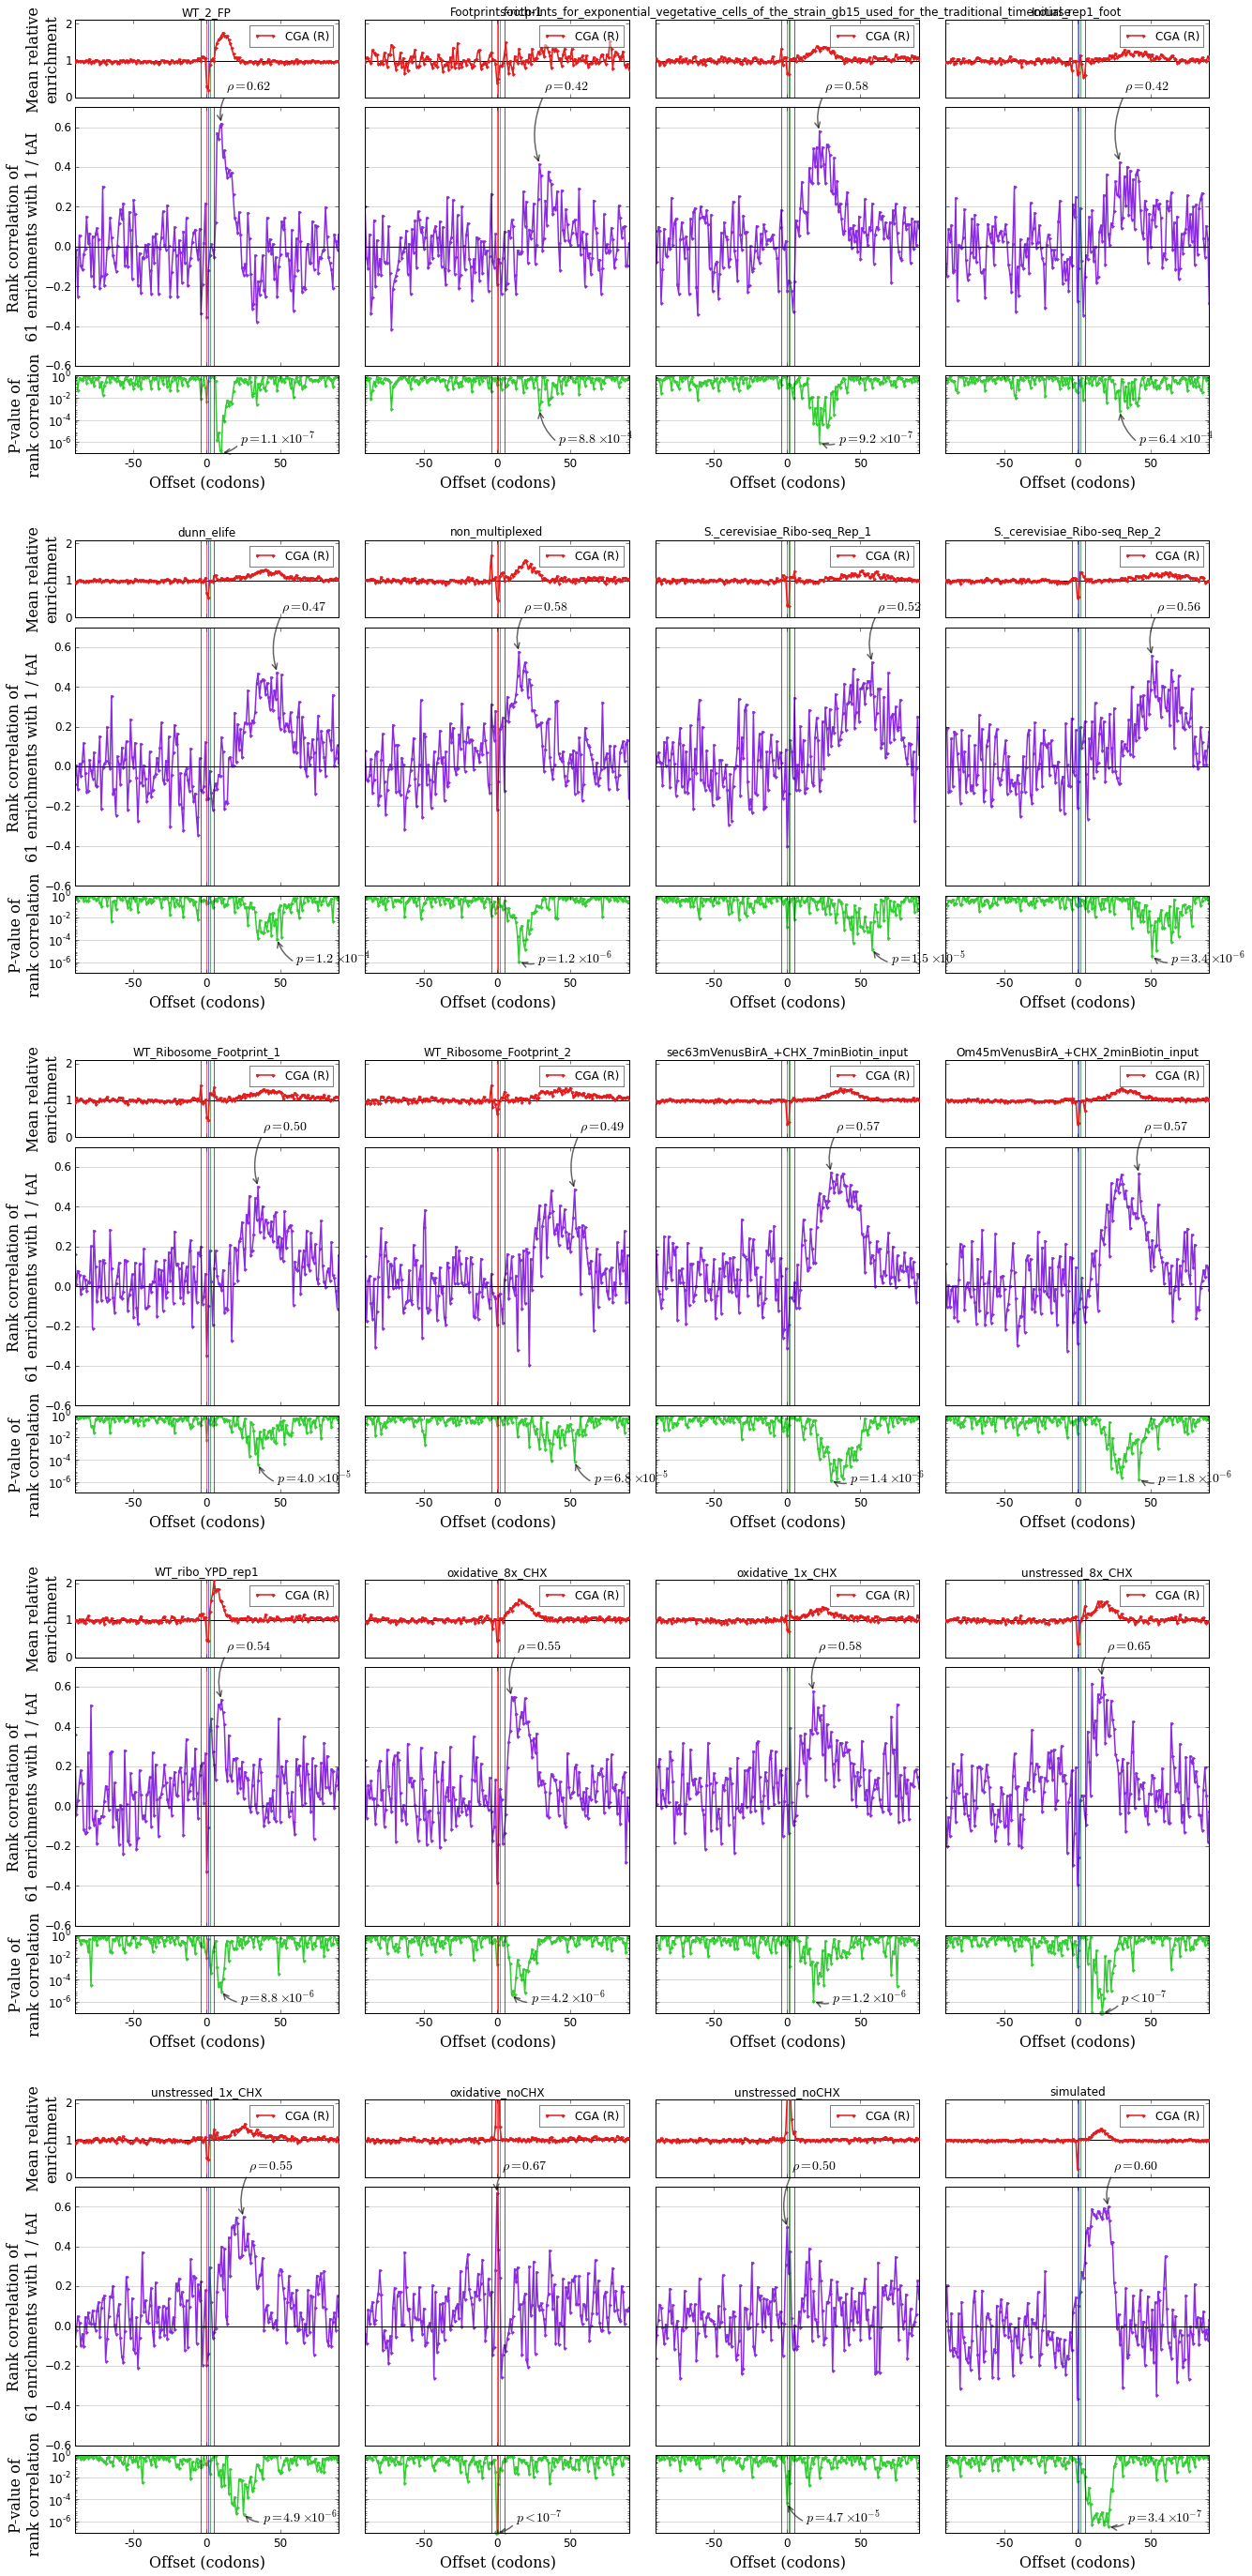

In [86]:
CHX_experiments = [
    ('WT_2_FP', 'Ours', slice(-7, -60, -1)),
    ('Footprints-rich-1', 'Ingolia', slice(-7, -60, -1)),
    ('footprints_for_exponential_vegetative_cells_of_the_strain_gb15_used_for_the_traditional_timecourse', 'Brar', slice(-7, -60, -1)),
    ('Initial_rep1_foot', 'Gerashchenko. PNAS', slice(-7, -60, -1)),
    ('dunn_elife', 'Dunn', slice(-7, -90, -1)),
    ('non_multiplexed', 'Artieri', slice(-7, -60, -1)),
    ('S._cerevisiae_Ribo-seq_Rep_1', 'McManus', slice(-10, -90, -1)),
    ('S._cerevisiae_Ribo-seq_Rep_2', 'McManus', slice(-10, -90, -1)),
    ('WT_Ribosome_Footprint_1', 'Zinshteyn', slice(-7, -90, -1)),
    ('WT_Ribosome_Footprint_2', 'Zinshteyn', slice(-7, -90, -1)),
    ('sec63mVenusBirA_+CHX_7minBiotin_input', 'Jan', slice(-7, -60, -1)),
    ('Om45mVenusBirA_+CHX_2minBiotin_input', 'Williams', slice(-7, -60, -1)),
    ('WT_ribo_YPD_rep1', 'Nedialkova', 'Nedialkova (CHX)'),
    ('oxidative_8x_CHX', 'oxidative 8x', slice(-7, -60, -1)),
    ('oxidative_1x_CHX', 'oxidative 8x', slice(-7, -60, -1)),
    ('unstressed_8x_CHX', 'unstressed 8x', slice(-7, -60, -1)),
    ('unstressed_1x_CHX', 'unstressed 8x', slice(-7, -60, -1)),
    ('oxidative_noCHX', 'oxidative no', slice(-7, -60, -1)),
    ('unstressed_noCHX', 'unstressed no', slice(-7, -60, -1)),
    ('simulated', 'simulated', slice(-7, -60, -1)),
]

names, labels, wave_slices = zip(*CHX_experiments)

fig, columns = pausing.offset_tAI_correlation(enrichments,
                                              names,
                                              (-90, 90),
                                              wave_slices,
                                     min_p=-7,
                                     rho_ylims=(-0.6, 0.7),
                                     enrichment_ylims=(0, 2.1),
                                     size=6,
                                     tRNA_value_source='tAI',
                                              condition=(0.1, 200, 200),
                                              smooth_window=0,
                                    )

#for column, label in zip(columns, labels):
#    column[0].set_title(label, size=18, y=1.05, color=pausing.light_CHX, weight='bold')
        
#fig.savefig('paper/waves_recover_tAI_correlation_all_CHX.png', bbox_inches='tight')

belgium_2014_12_10  	down+activ	+0.24	6.45e-02
ingolia             	down+activ	+0.50	4.61e-05
brar                	down+activ	+0.49	5.59e-05
gerashchenko pnas   	down+activ	+0.35	5.28e-03
dunn                	down+activ	+0.29	2.49e-02
artieri             	down+activ	+0.31	1.54e-02
mcmanus             	down+activ	+0.37	3.81e-03
zinshteyn           	down+activ	+0.26	4.05e-02
lareau +            	down+activ	+0.43	5.25e-04
nedialkova +        	down+activ	+0.35	5.03e-03
jan +               	down+activ	+0.47	1.19e-04
williams +          	down+activ	+0.38	2.39e-03


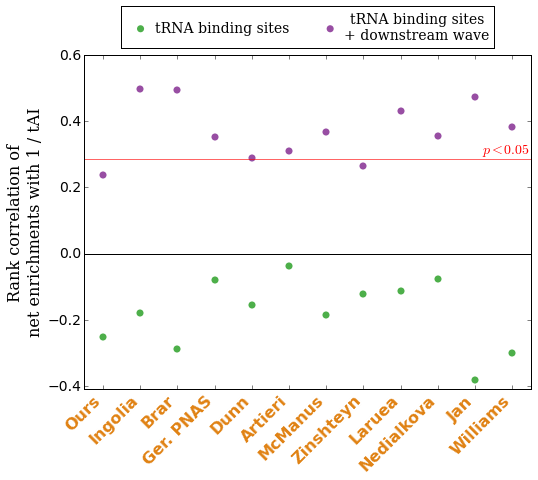

In [116]:
CHX_experiments = [
    ('belgium_2014_12_10', 'Ours', slice(-7, -30, -1)),
    ('ingolia', 'Ingolia', slice(-7, -60, -1)),
    ('brar', 'Brar', slice(-7, -60, -1)),
    ('gerashchenko pnas', 'Ger. PNAS', slice(-7, -60, -1)),
    ('dunn', 'Dunn', slice(-7, -90, -1)),
    ('artieri', 'Artieri', slice(-7, -90, -1)),
    ('mcmanus', 'McManus', slice(-7, -90, -1)),
    ('zinshteyn', 'Zinshteyn', slice(-7, -90, -1)),
    ('lareau +', 'Laruea', slice(-7, -30, -1)),
    ('nedialkova +', 'Nedialkova', slice(-7, -30, -1)),
    ('jan +', 'Jan', slice(-7, -60, -1)),
    ('williams +', 'Williams', slice(-7, -60, -1)),
]

names, labels, wave_slices = zip(*CHX_experiments)

fig = pausing.tAI_recovery(enrichments, names, labels, wave_slices)

fig.savefig('paper/waves_recover_tAI_correlation.png', bbox_inches='tight')

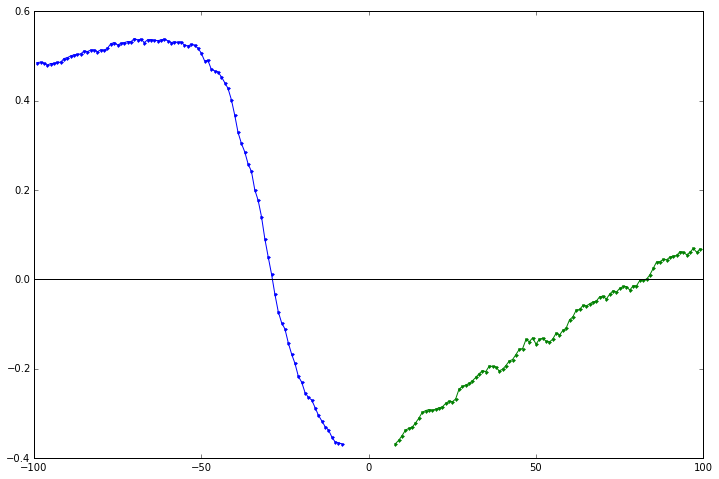

In [110]:
CHX_name = 'jan +'
condition = (0.1, 90, 90)

tAIs = pausing.load_tRNA_copy_numbers('tAI')
tAI_values = [tAIs[codon] for codon in codons.non_stop_codons]

xs = []
rhos = []
upstream_rhos = []

actives = (enrichments[CHX_name][condition, 'codon', -2:1, codons.non_stop_codons] - 1).sum(axis=0)

for wave_stop in np.arange(-8, -100, -1):
    xs.append(wave_stop)
    downstream_areas = (enrichments[CHX_name][condition, 'codon', -6:wave_stop:-1, codons.non_stop_codons] - 1).sum(axis=0)
    upstream_areas = (enrichments[CHX_name][condition, 'codon', 7:-wave_stop, codons.non_stop_codons] - 1).sum(axis=0)
    rho, p = scipy.stats.spearmanr(downstream_areas + actives, tAI_values)
    rhos.append(rho)
    rho, p = scipy.stats.spearmanr(upstream_areas + actives, tAI_values)
    upstream_rhos.append(rho)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(xs, rhos, '.-')
ax.plot(-np.asarray(xs), upstream_rhos, '.-')
ax.axhline(0, color='black')

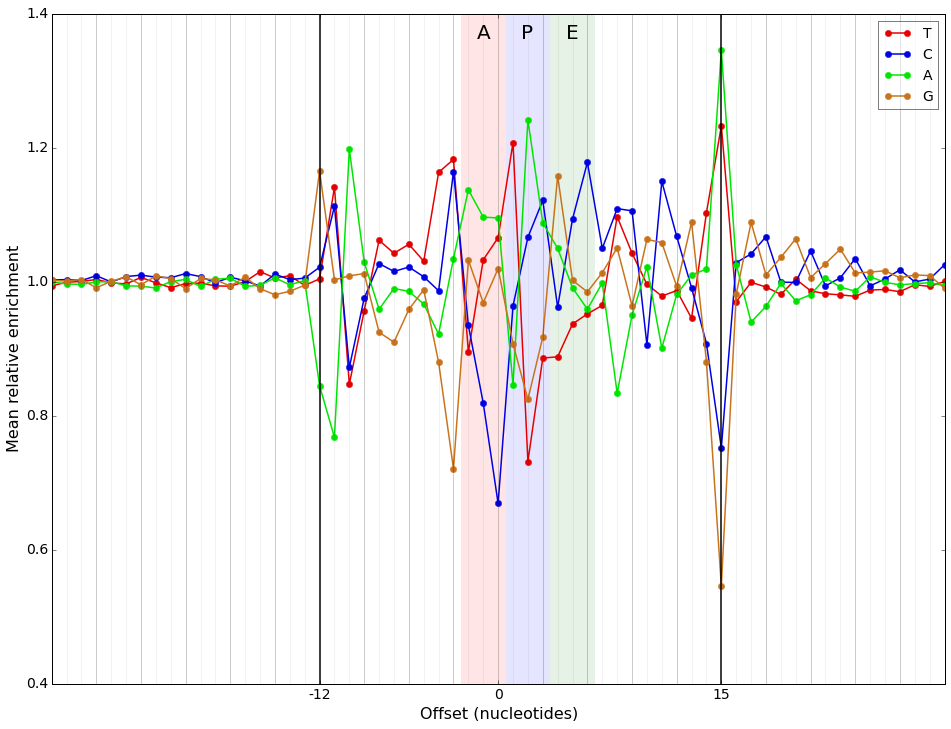

In [80]:
fig, ax = plt.subplots(figsize=(16, 12))

pausing.plot_nucleotide_enrichments(enrichments['oxidative_100x_CHX_rep1'],
                                    ax=ax,
                                    min_x=-30,
                                    max_x=30,
                                    flip=True,
                                    dense_lines=True,
                                    line_width=1.5,
                                    marker_size=12,
                                    minimal_ticks=True,
                                    legend_kwargs={'loc': 'upper right',
                                                   'fontsize': 14,
                                                  }
                                   )

ax.set_ylabel('Mean relative enrichment', size=16)
ax.set_xlabel('Offset (nucleotides)', size=16)
ax.set_ylim(0.4, 1.4)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_size(14)

fig.savefig('paper/edge_effects.png')